In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
import math
import seaborn as sns

In [33]:
filename = 'be987171c55349d19e3f739060a8783a.xls'
df = pd.read_excel(filename)
df.shape

(723, 22)

In [34]:
len(set(df['datetime']))
df = df[df['weekday'].isin([6,7])]
#df = df[df['weekday'].isin([i for i in range(1,6)])]
df['weekday'].value_counts()

7    113
6     88
Name: weekday, dtype: int64

In [35]:
df.shape

(201, 22)

In [36]:
#df['start_address_name'].value_counts()

In [37]:
#只统计每天第一次的数据
address_gps = []
address_gps.append(df.iloc[0]['start_gps_poi'])
for i in range(1,df.shape[0]):
    if df.iloc[i]['datetime'] != df.iloc[i-1]['datetime']:
        address_gps.append(df.iloc[i]['start_gps_poi'])
        address_gps.append(df.iloc[i-1]['end_gps_poi'])
address_gps.append(df.iloc[df.shape[0]-1]['end_gps_poi'])

In [38]:
len(address_gps)
#df['start_gps_poi'].head()

80

In [28]:
#使用所有的起始地址
# address_gps=df['start_gps_poi']
#
pointsList = []
for item in address_gps:
    point = []
    point.append(float(item.split(',')[0]))
    point.append(float(item.split(',')[1]))
    pointsList.append(point)     
pointsList[:10]

[[118.35050000000001, 35.0493333],
 [118.35050000000001, 35.049666599999995],
 [118.35066660000001, 35.049499999999995],
 [118.2608333, 35.7513333],
 [118.2608333, 35.7513333],
 [118.2609999, 35.75166659999999],
 [118.2609999, 35.75166659999999],
 [118.2609999, 35.75166659999999],
 [118.2608333, 35.75166659999999],
 [118.2633333, 35.7526666]]

In [8]:
#使用所有的起始地址
address_gps=df['start_gps_poi']
pointsList1 = []
dict_a = {}
for item in address_gps:
    point = []
    point.append(float(item.split(',')[0]))
    point.append(float(item.split(',')[1]))
    point.append(1)
    pointsList1.append(point)  
print(len(pointsList1))
with open('a.txt','w') as f:
    f.write(str(pointsList1))

201


In [29]:
with open('a.txt','w') as f:
    f.write(str(pointsList1))

In [327]:
xy = np.array(pointsList)
#xy[:,0]
xy[:10]

array([[118.2609999,  35.7516666],
       [118.2609999,  35.7518333],
       [118.2609999,  35.7516666],
       [118.2609999,  35.7516666],
       [118.2609999,  35.7516666],
       [118.2633333,  35.6623333],
       [118.3506666,  35.0495   ],
       [118.351    ,  35.0509999],
       [118.3505   ,  35.0493333],
       [118.351    ,  35.0493333]])

In [328]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
#X
# X.describe()

In [329]:
# kmeans = KMeans(n_clusters = 3)
# re = kmeans.fit(xy)

In [330]:
#re.labels_

In [331]:
X[:10]
#dir(re)

,lng,lat
0,118.261000,35.751667
1,118.261000,35.751833
2,118.261000,35.751667
3,118.261000,35.751667
4,118.261000,35.751667
5,118.263333,35.662333
6,118.350667,35.049500
7,118.351000,35.051000
8,118.350500,35.049333
9,118.351000,35.049333


In [332]:
fig =plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

h:\python\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


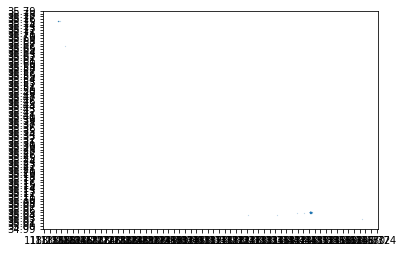

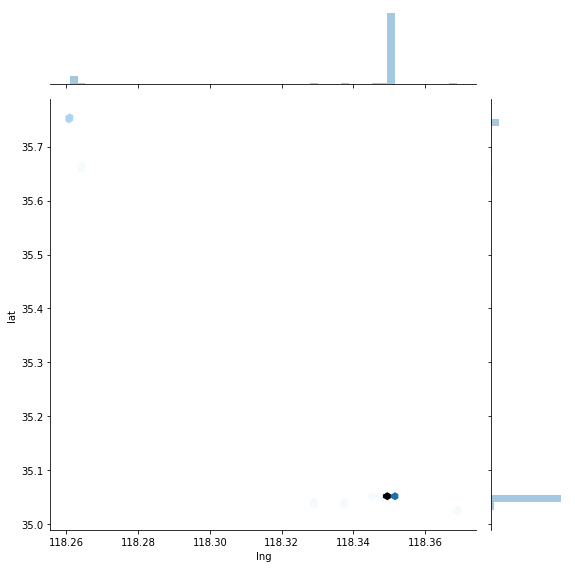

In [333]:
plt.scatter(xy[:,0],xy[:,1],s=0.01)
plt.locator_params(nbins = 100)

sns.jointplot(x='lng',y='lat',data=X,kind='hex',size=(8))

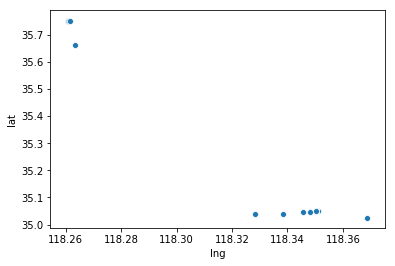

In [334]:
sns.scatterplot(x='lng',y='lat',data=X)

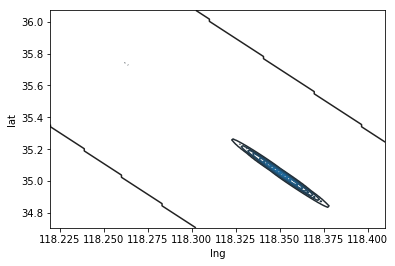

In [335]:
sns.kdeplot(X['lng'],X['lat'])

In [336]:
def haversine(lonlat1, lonlat2):
    lon1, lat1  = lonlat1
    lon2, lat2= lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1000


In [337]:
haversine([116.456, 39.921],[116.456, 39.920])

111.19492664426889

In [338]:
Y=[[1.001,2.000],[1.002,2.000],[1.003,2.000],[1.003,2.000]]
squareform(pdist(Y, (lambda u, v: haversine(u, v))))

array([[  0.       , 111.1271897, 222.2543794, 222.2543794],
       [111.1271897,   0.       , 111.1271897, 111.1271897],
       [222.2543794, 111.1271897,   0.       ,   0.       ],
       [222.2543794, 111.1271897,   0.       ,   0.       ]])

In [339]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
def clustering_by_dbscan():
    
    distance_matrix = squareform(pdist(X, (lambda u, v: haversine(u, v))))
    # 2代表两公里  
    db = DBSCAN(eps=100, min_samples=15, metric='precomputed')  
    y_db = db.fit_predict(distance_matrix)
    X['cluster'] = y_db
    plt.scatter(X['lng'], X['lat'], c=X['cluster'])
    plt.show()
#X['cluster'].value_counts()


In [340]:
X.head()

,lng,lat
0,118.261,35.751667
1,118.261,35.751833
2,118.261,35.751667
3,118.261,35.751667
4,118.261,35.751667


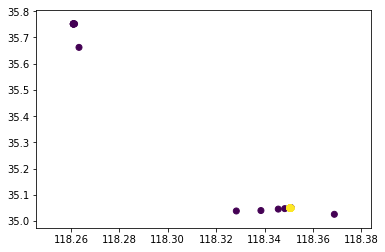

In [341]:
clustering_by_dbscan()

In [342]:
cluster = X['cluster'].value_counts().keys()[0]
cluster

0

In [343]:
X['cluster'].value_counts()
X_dict = dict(X['cluster'].value_counts())
X_dict

{0: 65, -1: 15}

In [344]:
total_count = X[X['cluster']!=-1].shape[0]
total_count

65

In [345]:
xx = X[X['cluster'] == 0].groupby(['lat','lng']).sum().reset_index()
xx

,lat,lng,cluster
0,35.049167,118.350500,0
1,35.049167,118.350667,0
2,35.049167,118.350833,0
3,35.049167,118.351000,0
4,35.049333,118.350333,0
5,35.049333,118.350500,0
6,35.049333,118.350667,0
7,35.049333,118.351000,0
8,35.049500,118.350500,0
9,35.049500,118.350667,0


In [346]:
X['count'] = 1
lens = len(set(X['cluster'])) - 1 #去掉-1 并且从0 开始计数
for i in range(lens):
    xx = X[X['cluster'] == i].groupby(['lat','lng']).sum().reset_index()
    a = xx[xx['count'] ==max(xx['count'])]
    pro_1 = a['count'] / X_dict[i]   #当前簇中出现最高次数的地点所占比例
    pro_2 = X_dict[i] / total_count  #当前簇所占比例
    pro_all = pro_1 * pro_2
    
    #xx[xx['count'] ==max(xx['count'])]
    print(a)
    print(pro_all)

         lat       lng  cluster  count
5  35.049333  118.3505        0     16
8  35.049500  118.3505        0     16
5    0.246154
8    0.246154
Name: count, dtype: float64


In [347]:
a = xx[xx['count'] ==max(xx['count'])]
xx[xx['count'] ==max(xx['count'])]

,lat,lng,cluster,count
5,35.049333,118.3505,0,16
8,35.049500,118.3505,0,16


In [350]:
a['lat'].iloc[0]

35.0493333

In [351]:
a['lng'].iloc[0]

118.35050000000001

In [352]:
X['cluster'].value_counts().values[0]/X.shape[0]

0.8125

In [353]:
X[X['cluster'] == cluster][:10]

,lng,lat,cluster,count
6,118.350667,35.049500,0,1
8,118.350500,35.049333,0,1
9,118.351000,35.049333,0,1
11,118.350500,35.049167,0,1
12,118.350833,35.049167,0,1
13,118.350833,35.049167,0,1
14,118.350500,35.049500,0,1
15,118.350333,35.049667,0,1
16,118.350500,35.049500,0,1
17,118.350667,35.049500,0,1


In [354]:
X[X['cluster'] == cluster]['lng'].mean()

118.35057433692309

In [355]:
X[X['cluster'] == cluster]['lat'].mean()

35.049366638461535

In [356]:
120.12049999999999,29.338833300000005

(120.12049999999999, 29.338833300000005)

In [357]:
X[:10]

,lng,lat,cluster,count
0,118.261000,35.751667,-1,1
1,118.261000,35.751833,-1,1
2,118.261000,35.751667,-1,1
3,118.261000,35.751667,-1,1
4,118.261000,35.751667,-1,1
5,118.263333,35.662333,-1,1
6,118.350667,35.049500,0,1
7,118.351000,35.051000,-1,1
8,118.350500,35.049333,0,1
9,118.351000,35.049333,0,1


In [358]:
from sklearn.neighbors import KernelDensity

In [359]:
def kernel_density(x, y, typename):
    x_min = min(x)
    x_max = max(x)
    y_min = min(y)
    y_max = max(y)
    xx = list(zip(x, y))
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1, algorithm='kd_tree').fit(xx)
    log_dens = kde.score_samples(xx)
    z = np.exp(log_dens).tolist()
    max_poi = z.index(max(z))
#     print(xx[z.index(max(z))])
    max_lon = x[max_poi]
    max_lat = y[max_poi]
    fig1 = plt.figure()
    ax1 = fig1.gca()
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.scatter(x, y, c=z, cmap='Blues')
    ax1.scatter(x[max_poi], y[max_poi],marker='p', c='r')
#     ax1.imshow(np.rot90(z), cmap = 'Blues', extent=[x_min, x_max, y_min, y_max])
#     cset = ax1.contour(x, y, z, colors='k')
#     ax1.clabel(cset, inline = 1, fontsize=10)
    ax1.set_xlabel('lontitude')
    ax1.set_ylabel('latitude')
#     filename = typename+' gkde1.jpg'
#     plt.savefig(filename)
    return max_lon, max_lat

(118.35050000000001, 35.04916660000001)

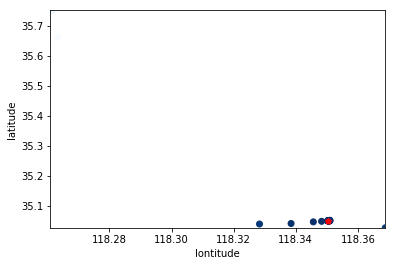

In [360]:
x = X['lng']
y = X['lat']

kernel_density(x,y,'a')


In [275]:
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
x_min

107.3378333

In [276]:
xx = list(zip(x, y))
xx

[(107.41516660000002, 26.568333300000006),
 (107.41500000000002, 26.568166599999998),
 (107.41449990000001, 26.5668333),
 (107.41583329999997, 26.570499999999996),
 (107.4148333, 26.568166599999998),
 (107.4148333, 26.567999999999998),
 (107.41500000000002, 26.568166599999998),
 (107.58449999999999, 26.168499999999995),
 (107.4148333, 26.567999999999998),
 (107.4148333, 26.567999999999998),
 (107.4148333, 26.567999999999998),
 (119.66449990000001, 30.579333300000002),
 (117.2849999, 29.88900000000001),
 (119.66433330000001, 30.579000000000008),
 (119.66449990000001, 30.579499999999996),
 (119.66383330000002, 30.579666599999996),
 (119.66449990000001, 30.579333300000002),
 (119.66433330000001, 30.579333300000002),
 (119.66449990000001, 30.579333300000002),
 (119.66433330000001, 30.579499999999996),
 (119.66449990000001, 30.579333300000002),
 (119.66433330000001, 30.579000000000008),
 (119.66333329999998, 30.57983329999999),
 (119.66433330000001, 30.579000000000008),
 (119.66416659999999

In [277]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.1, algorithm='kd_tree').fit(xx)
log_dens = kde.score_samples(xx)
log_dens

array([ 2.00852223,  2.00845481,  2.00797947,  2.00881158,  2.00841696,
        2.00838214,  2.00845481, -1.47860425,  2.00838214,  2.00838214,
        2.00838214,  1.88608169, -1.48120212,  1.88607972,  1.88607963,
        1.88606713,  1.88608169,  1.88608394,  1.88608169,  1.88608188,
        1.88608169,  1.88607972,  1.8860246 ,  1.88607972,  1.88608135,
        1.88607972,  1.88608169,  1.88607972,  1.88608169,  1.88607972,
        1.88606713,  1.88608394,  1.88608169,  1.88607972,  1.88606713,
        1.88608169,  1.88608169,  1.88608188,  1.88608169,  1.88607963,
        1.88599016,  2.00838214, -1.48120212,  2.00838214,  2.008487  ,
       -0.0949095 , -0.0949088 ,  2.00845481, -0.0949088 ,  1.85441804,
        1.85311777, -0.0949088 ,  1.31856244,  2.00838214,  2.00841696,
        2.00838214,  2.00855176,  2.00852223,  2.00876292,  2.00845481,
        2.00841696,  1.57728635,  2.00841696,  2.00838214,  2.00838214,
        2.00841993,  2.00861127,  2.00838214,  2.00838214,  2.00

In [278]:
z = np.exp(log_dens).tolist()
z

[7.452296410552364,
 7.4517940295965,
 7.44825274830049,
 7.454453078747522,
 7.451511955518219,
 7.451252538966383,
 7.4517940295965,
 0.22795563522804665,
 7.451252538966383,
 7.451252538966383,
 7.451252538966383,
 6.593482680150598,
 0.22736420441699318,
 6.593469730182182,
 6.593469098446932,
 6.593386695749422,
 6.593482680150598,
 6.593497514567214,
 6.593482680150598,
 6.593483932836821,
 6.593482680150598,
 6.593469730182182,
 6.593106296495844,
 6.593469730182182,
 6.593480459256463,
 6.593469730182182,
 6.593482680150598,
 6.593469730182182,
 6.593482680150598,
 6.593469730182182,
 6.593386695749422,
 6.593497514567214,
 6.593482680150598,
 6.593469730182182,
 6.593386695749422,
 6.593482680150598,
 6.593482680150598,
 6.593483932836821,
 6.593482680150598,
 6.593469098446932,
 6.592879247297209,
 7.451252538966383,
 0.22736420441699318,
 7.451252538966383,
 7.45203385632057,
 0.9094552381202317,
 0.90945586993924,
 7.4517940295965,
 0.9094558699388006,
 6.387979631628709,
 

Text(0, 0.5, 'latitude')

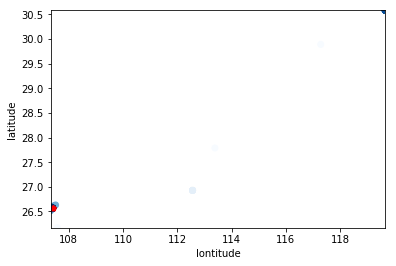

In [279]:
max_poi = z.index(max(z))
#     print(xx[z.index(max(z))])
max_lon = x[max_poi]
max_lat = y[max_poi]
fig1 = plt.figure()
ax1 = fig1.gca()
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.scatter(x, y, c=z, cmap='Blues')
ax1.scatter(x[max_poi], y[max_poi],marker='p', c='r')
# ax1.imshow(np.rot90(xy), cmap = 'Blues', extent=[x_min, x_max, y_min, y_max])
# cset = ax1.contour(x, y, z, colors='k')
# ax1.clabel(cset, inline = 1, fontsize=10)
ax1.set_xlabel('lontitude')
ax1.set_ylabel('latitude')
#filename = typename+' gkde1.jpg'
#pl.savefig(filename)
    #return max_lon, max_lat

In [80]:
max_lon
max_lat

26.597499999999997

In [81]:
np.rot90(xy)

array([[ 26.6301666,  26.5565   ,  26.5668333,  26.5845   ,  26.5693333,
         26.5773333,  26.5681666,  26.5758333,  26.568    ,  26.5793333,
         26.5681666,  26.5841666,  26.5681666,  26.6301666,  26.5681666,
         26.5191666,  26.568    ,  26.636    ,  26.636    ,  26.6375   ,
         26.6361666,  26.6298333,  26.5838333,  26.5843333,  26.568    ,
         26.5845   ,  27.5298333,  28.2683333,  28.7318333,  29.4535   ,
         29.2933333,  29.889    ,  30.617    ,  30.5795   ,  30.617    ,
         30.5793333,  30.6168333,  30.617    ,  30.5793333,  30.5793333,
         30.5793333,  30.617    ,  30.5793333,  30.6168333,  30.6168333,
         30.5798333,  30.6168333,  30.5798333,  30.6168333,  30.6168333,
         30.6138333,  30.6103333,  30.5795   ,  30.6168333,  30.5793333,
         30.5793333,  30.6168333,  30.617    ,  30.5796666,  30.6168333,
         30.5793333,  30.617    ,  30.5796666,  30.6168333,  30.5793333,
         30.5793333,  30.578    ,  30.5793333,  30.

In [41]:
len(xy[0])

2